<a href="https://colab.research.google.com/github/sagar2582/Capstone-5-Face-Emotion-Recognition/blob/main/Face_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.1 Introduction
* The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.
* Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.
* In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (ex-
Zoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

# 1.2 Problem Statement
We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by recognizing facial emotions.
* 1.2.1 - **Face Emotion Recognition**
> This is a few shot learning live face emotion detection system. The model should be able to real-time
identify the emotions of students in a live class.



# 1.3 Scope of Project


> A. Model should be able to identify students’ emotions using minimum reference images.

> B. Model should work on the real-time webcam video feed.

> C. Model must be deployed on AWS/GCP/Azure platform as an end-to-end solution.

> D. Model must be accessible via a web application (Streamlit) for demo purposes.


# Dataset Information
The data comes from the past Kaggle competition “Challenges in Representation Learning: Facial Expression Recognition Challenge”. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image.

This dataset contains 35887 grayscale 48x48 pixel face images.

Each image corresponds to a facial expression in one of seven categories

Labels:

> 0 - Angry 😠

> 1 - Disgust 😧

> 2 - Fear 😨

> 3 - Happy 😃

> 4 - Sad 😞

> 5 - Surprise 😮

> 6 - Neutral 😐

* Dataset link - https://www.kaggle.com/msambare/fer2013

# Using DeepFace
> Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python.

> The process of facial recognition starts with the human face and identifying its necessary facial features and patterns. A human face comprises a very basic set of features, such as eyes, nose, and mouth. Facial recognition technology learns what a face is and how it looks. This is done by using deep neural network & machine learning algorithms on a set of images with human faces looking at different angles or positions.

In [ ]:
# import libraries for deep face

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# installing deepface library

!pip install deepface

In [ ]:
from deepface import DeepFace

In [ ]:
# Importing drive
from google.colab import drive
drive.mount('/content/drive')

## Image Prediction using DeepFace

In [ ]:
pip install Pillow

In [ ]:
from PIL import Image

In [ ]:
path = ("/content/drive/MyDrive/Colab Notebooks/Capstone - 5 Deep Learning/HappyFace.jpg")

In [ ]:
img = Image.open(path)

# Converting the image into the numpy array
img_array = np.array(img)

In [ ]:
img_array = cv.imread(path)

In [ ]:
plt.imshow(img_array)
plt.show()

In [ ]:
# convert image from BGR to RGB to work on RGB images

plt.imshow(cv.cvtColor(img_array, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
# image prediction

img_prediction = DeepFace.analyze(img_array)

In [ ]:
img_prediction

#**Result**
* From deepface some predictions are good but some are not i.e. age is predicted inaccurate but dominant_race predicted is correct. We will be building another model for more better results accuracy. We use CNN model below.

# Transfer Learning - Prediction using ResNet50
> Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks. Reusing or transferring information from previously learned tasks to learning of new tasks has the potential to significantly improve the sample efficiency of a Data Scientist.

> ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

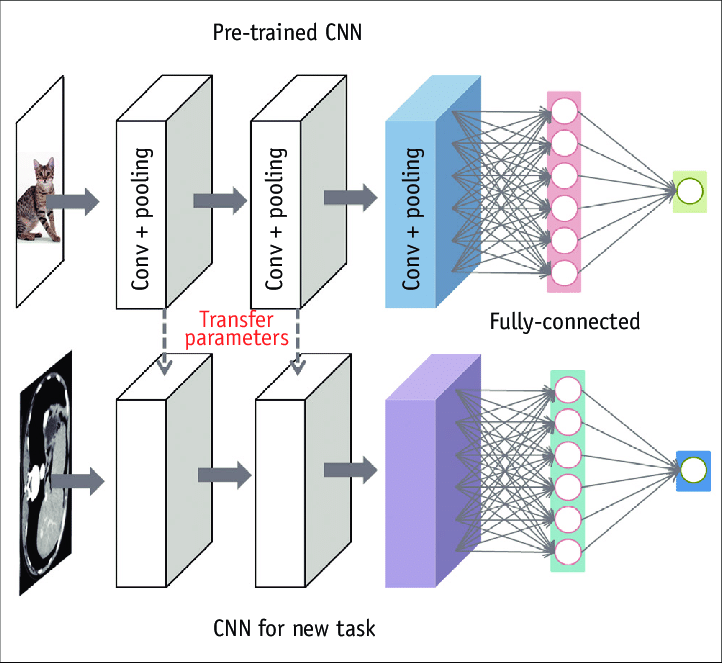

In [ ]:
# importing required libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout,Flatten, BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np 
import cv2
import os

# Removing Warnings

import warnings                                                                                
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
# print version of tensorflow

print("Tensorflow version:", tf.__version__)

In [ ]:
# importing zip file from google drive and extracting here.

from zipfile import ZipFile
filename = "/content/drive/MyDrive/Colab Notebooks/Capstone - 5 Deep Learning/archive.zip"

# Extraction
with ZipFile(filename , 'r') as zip:
  zip.extractall()
  print('Zip file extracted successfully')

In [ ]:
#test and train data

test_data = '/content/test/'
train_data = '/content/train/'

In [ ]:
#list the directory of test path

os.listdir(test_data)

In [ ]:
os.listdir(train_data)

In [ ]:
#define a function to plot some images from different classes

def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]

    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

In [ ]:
#angry class
plot_images(train_data+'/angry')
#disgust class
plot_images(train_data+'/disgust')
#fear class
plot_images(train_data+'/fear')
#happy class
plot_images(train_data+'/happy')
#neutral class
plot_images(train_data+'/neutral')
#sad class
plot_images(train_data+'/sad')
#surprise class
plot_images(train_data+'/surprise')

In [ ]:
for expression in os.listdir(train_data):
  print(str(len(os.listdir(train_data + expression))) + " " + expression + " images")

## ResNet Data Generators

In [ ]:
# resnet is trained on rgb photos and we have grascaled images so converting colour mode to rgb is important

datagen_train = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)
datagen_validation = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)

In [ ]:
# size of image and batch

#######################
img_size = 48         
batch_size = 32       
#######################  

train_generator = datagen_train.flow_from_directory(train_data,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

validation_generator = datagen_train.flow_from_directory(test_data,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

## Building ResNet model with CNN

In [ ]:
#using pretrained model, RESNET50 architecture

from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
# creating a base model using resnet and loading the pretrained weights 

base_model = ResNet50(input_shape=(48,48,3),include_top = False, weights = 'imagenet')
base_model.summary()

In [ ]:
# making all the layers except last 4 layers non trainable 

for layer in base_model.layers[:-4]:
    layer.trainable = False

In [ ]:
# Build model on the top of base model

###########
epochs=50
batch_size = 32
###########

model = Sequential()

model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())

#Fully connected 1st layer
model.add(Dense(512,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(256,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))

#output layer
model.add(Dense(7, activation='softmax'))


# Final model summary
model.summary()


# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])


steps_per_epoch = train_generator.n//train_generator.batch_size

validation_steps = validation_generator.n//validation_generator.batch_size


# this decreases the learning rate if the model loss does not decrease 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=10, min_lr=0.00001, mode='auto')

In [ ]:
# to save model weights to my drive loaction

weight_checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/Capstone - 5 Deep Learning/Model_Checkpoint/model_weights_resnet.h5'

checkpoint = ModelCheckpoint(weight_checkpoint_path, monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=10,
                            verbose=1,
                            restore_best_weights=True)
callbacks = [checkpoint, reduce_lr,early_stopping]


# Fitting the model 
history = model.fit(
    x=train_generator,
    batch_size=batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    callbacks=callbacks,
    verbose=1)

In [ ]:
# save history of the model in dataframe df_modelhis
df_modelhis=pd.DataFrame(model.history.history)

df_modelhis[['loss','val_loss']].plot()
#Plotting Loss

In [ ]:
#Plotting accuracy

df_modelhis[['accuracy','val_accuracy']].plot()

We have trained the model with ResNet50 and got the training accuracy of 44.25% and validation accuracy of 40.64% which is not acceptaable.This error is may be because the model was trained on rgb images and the data set contains grascale images.

# Custom CNN Model
> A convolution network generally consists of alternate convolution and max-pooling operations. The output obtained after applying convolution operation is shrunk using max-pooling operation which is then used as an input for the next layer. 

> A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics. The architecture of a ConvNet is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.


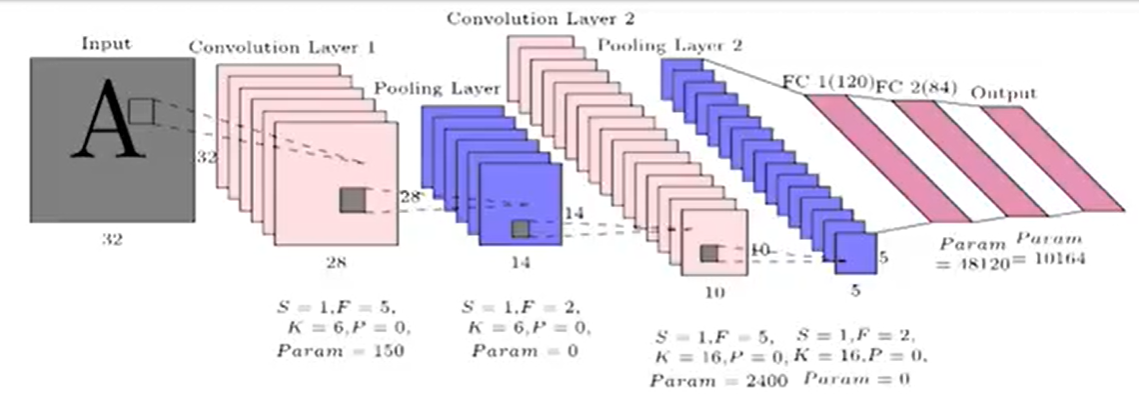

In [ ]:
# Importing Deep Learning Libraries

import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop